In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import os
import warnings
from zipfile import ZipFile
import requests
import tensorflow.keras as keras


In [4]:

source_dir = os.path.join('UCMerced_LandUse_copy', 'Images')
if not os.path.isdir(source_dir):
    with ZipFile('UCMerced_LandUse.zip') as z:
        z.extractall(path='data')

class_names = os.listdir(source_dir)    

In [5]:
print(class_names)

['forest', 'buildings', 'river', 'mobilehomepark', '.DS_Store', 'harbor', 'golfcourse', 'agricultural', 'runway', 'baseballdiamond', 'overpass', 'chaparral', 'tenniscourt', 'intersection', 'airplane', 'parkinglot', 'sparseresidential', 'mediumresidential', 'denseresidential', 'beach', 'freeway', 'storagetanks']


In [8]:
flow_base = os.path.join('data', 'flow')
target_dirs = {target: os.path.join(flow_base, target) for target in ['train', 'validate', 'test']}

In [9]:
if not os.path.isdir(flow_base):

    # Make new directories
    os.mkdir(flow_base)
    
    for target in ['train', 'validate', 'test']:
        target_dir = os.path.join(flow_base, target)
        os.mkdir(target_dir)
        for class_name in class_names:
            class_subdir = os.path.join(target_dir, class_name)
            os.mkdir(class_subdir)

    # suppress low-contrast warning from skimage.io.imsave
    warnings.simplefilter('ignore', UserWarning)
    
    # Copy images from ./data/UCMerced_LandUse/Images to ./data/flow/<train, validate, test>    
    for root, _, filenames in os.walk(source_dir):
        if filenames:
            class_name = os.path.basename(root)

            # Randomly shuffle filenames
            filenames = np.random.permutation(filenames)
            for target, count in [('train', 80), ('validate', 10), ('test', 10)]:
                target_dir = os.path.join(flow_base, target, class_name)
                for filename in filenames[:count]:
                    filepath = os.path.join(root, filename)
                    image = imread(filepath)
                    basename, _ = os.path.splitext(filename)
                    # Convert TIF to PNG to work with Keras ImageDataGenerator.flow_from_directory
                    target_filename = os.path.join(target_dir, basename + '.png')
                    imsave(target_filename, image)
            
                filenames = filenames[count:]
  

  
    # Show future warnings during development
    warnings.resetwarnings()



In [6]:
train_csv = pd.read_csv("archive/train.csv")
test_csv = pd.read_csv("archive/test.csv")
val_csv = pd.read_csv("archive/validation.csv")


In [7]:
train_csv.head()

,Unnamed: 0,Filename,Label,ClassName
0,5818,runway/runway_000259.png,16,runway
1,1327,intersection/intersection_000348.png,10,intersection
2,2529,agricultural/agricultural_000025.png,0,agricultural
3,3865,chaparral/chaparral_000195.png,5,chaparral
4,2024,airplane/airplane_000260.png,1,airplane


In [8]:
test_csv.head()

,Unnamed: 0,Filename,Label,ClassName
0,311,river/river_000149.png,15,river
1,975,mediumresidential/mediumresidential_000335.png,11,mediumresidential
2,547,overpass/overpass_000338.png,13,overpass
3,670,storagetanks/storagetanks_000307.png,18,storagetanks
4,330,river/river_000370.png,15,river


In [9]:
#Show number of samples in each class in train
train_csv['ClassName'].value_counts()

runway               350
baseballdiamond      350
parkinglot           350
beach                350
forest               350
mobilehomepark       350
river                350
sparseresidential    350
freeway              350
golfcourse           350
mediumresidential    350
intersection         350
buildings            350
harbor               350
overpass             350
tenniscourt          350
storagetanks         350
airplane             350
chaparral            350
agricultural         350
denseresidential     350
Name: ClassName, dtype: int64

In [10]:
#Show number of samples in each class in test
test_csv['ClassName'].value_counts()

river                50
airplane             50
baseballdiamond      50
agricultural         50
parkinglot           50
freeway              50
sparseresidential    50
mobilehomepark       50
forest               50
intersection         50
runway               50
mediumresidential    50
beach                50
denseresidential     50
buildings            50
tenniscourt          50
chaparral            50
golfcourse           50
storagetanks         50
overpass             50
harbor               50
Name: ClassName, dtype: int64

In [11]:
#Show number of samples in each class in test
val_csv['ClassName'].value_counts()

mediumresidential    100
runway               100
sparseresidential    100
golfcourse           100
chaparral            100
storagetanks         100
airplane             100
freeway              100
beach                100
forest               100
mobilehomepark       100
buildings            100
overpass             100
river                100
parkinglot           100
harbor               100
intersection         100
baseballdiamond      100
denseresidential     100
tenniscourt          100
agricultural         100
Name: ClassName, dtype: int64

In [12]:
# Read train and test data from image directories
train = keras.utils.image_dataset_from_directory("archive/images_train_test_val/train")
test = keras.utils.image_dataset_from_directory("archive/images_train_test_val/test")
val = keras.utils.image_dataset_from_directory("archive/images_train_test_val/validation")


Found 7350 files belonging to 21 classes.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 1050 files belonging to 21 classes.


2022-05-05 12:44:24.866971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-05 12:44:24.867365: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 2100 files belonging to 21 classes.


In [13]:
class_names = train.class_names
import json
with open("archive/label_map.json","r") as file:
    class_name_binarized = json.load(file)

num_classes = len(class_name_binarized)
class_names = list(class_name_binarized.keys())
class_name_binarized

{'agricultural': 0,
 'airplane': 1,
 'baseballdiamond': 2,
 'beach': 3,
 'buildings': 4,
 'chaparral': 5,
 'denseresidential': 6,
 'forest': 7,
 'freeway': 8,
 'golfcourse': 9,
 'intersection': 10,
 'mediumresidential': 11,
 'mobilehomepark': 12,
 'overpass': 13,
 'parkinglot': 14,
 'river': 15,
 'runway': 16,
 'sparseresidential': 17,
 'storagetanks': 18,
 'tenniscourt': 19,
 'harbor': 20}

2022-05-05 12:44:25.175997: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


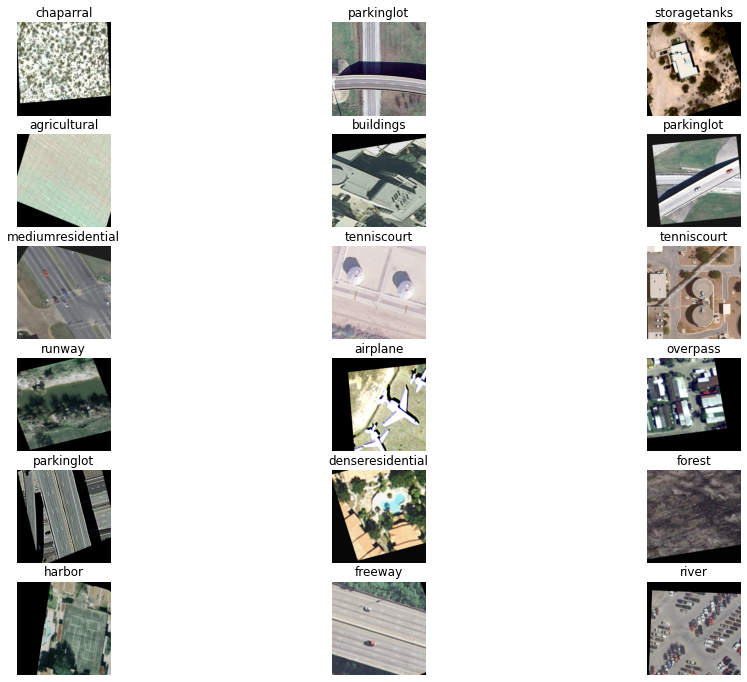

In [14]:
#Show samples from each class in train
#Pixel resolution is 1 foot and images are 256x256
plt.figure(figsize=(16, 12))
for images, labels in train.take(1):
  for i in range(18):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

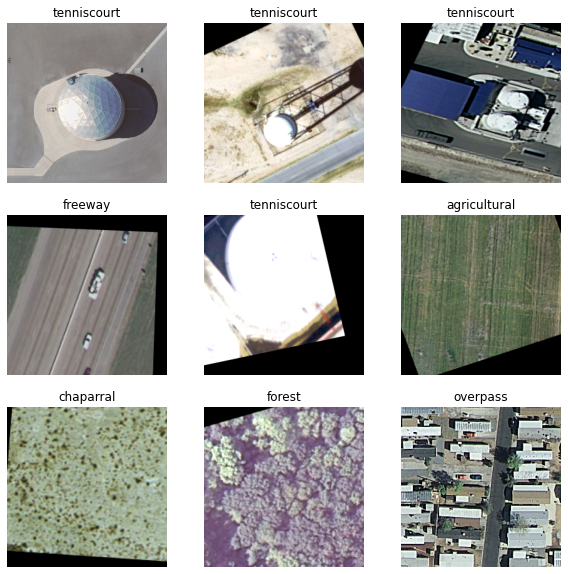

In [15]:
#SHow one example from each class in test
plt.figure(figsize=(10, 10))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<AxesSubplot:>

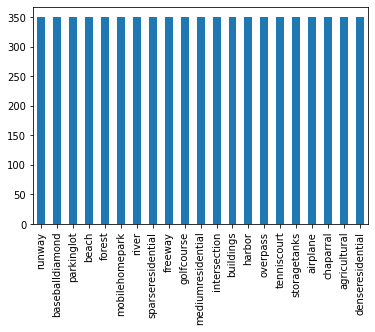

In [16]:
#Bar chart of number of samples in each class in train
train_csv['ClassName'].value_counts().plot(kind='bar')


In [17]:
train_csv.shape, test_csv.shape, val_csv.shape

((7350, 4), (1050, 4), (2100, 4))

In [20]:
image_path = "UCMerced_Landuse/Images"


In [21]:
data = keras.utils.image_dataset_from_directory(image_path)

Found 0 files belonging to 21 classes.


ValueError: No images found in directory UCMerced_Landuse/Images. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')